In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# lets bring in our already preprocessed (cleaned) auto data
df = pd.read_csv("preprocessed_data.csv")

In [4]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned
0,0,3,128.267677,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0,low
1,1,3,128.267677,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0,low
2,2,1,128.267677,alfa-romero,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0,low
3,3,2,164.000000,audi,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0,low
4,4,2,164.000000,audi,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0,low


<h1>Residual plot</h1>: we can know if a linear model is appropriate for fitting our data by using a residplot

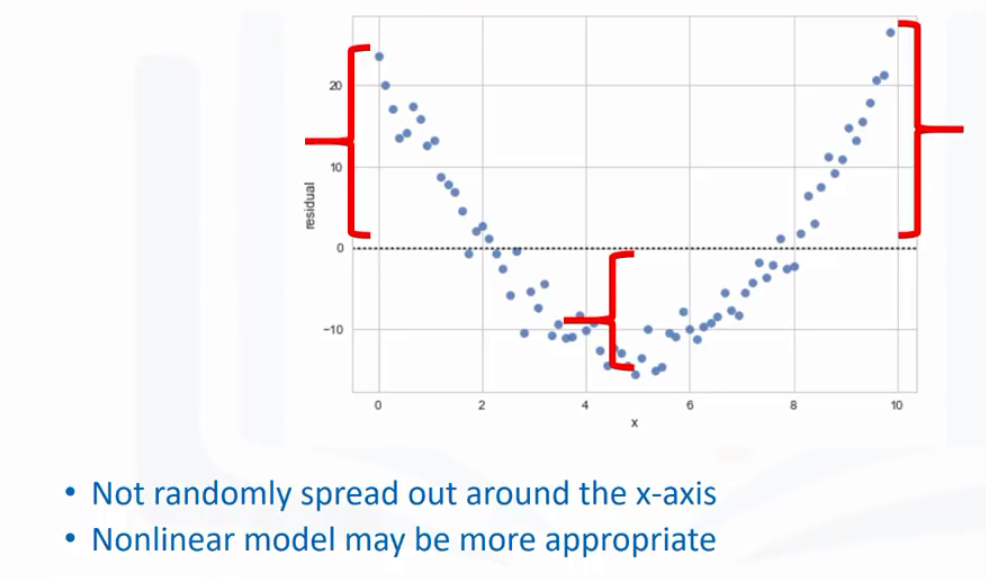

In [8]:
import seaborn as sns

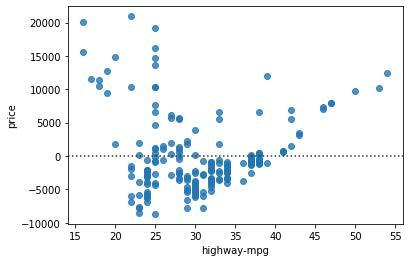

In [9]:
sns.residplot(df['highway-mpg'], df['price'])

In [10]:
# in the above plot, we see a curvature, a non-linear function will be appropriate

# Polynomial Regression

In [13]:
# to calculate a third order polynomial for one dimensional parameter
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.553 x + 204.3 x - 8948 x + 1.377e+05


In [45]:
# to calculate a third order polynomial regression model for multi dimension
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
x_polly = pr.fit_transform(df[['horsepower', 'curb-weight', 'engine-size']])
# we can also normalize the parameters before transforming it 
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
SCALE.fit(df[['horsepower', 'curb-weight', 'engine-size']])
x_scale = SCALE.transform(df[['horsepower', 'curb-weight', 'engine-size']])

C:\Users\me\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [50]:
x_scale

array([[ 0.20296699, -0.01548585,  0.07625546],
       [ 0.20296699, -0.01548585,  0.07625546],
       [ 1.35087746,  0.51484142,  0.60449348],
       [-0.03729334, -0.4223915 , -0.42797173],
       [ 0.30974936,  0.51676988,  0.22032038],
       [ 0.1762714 , -0.09455282,  0.22032038],
       [ 0.1762714 ,  0.55533914,  0.22032038],
       [ 0.1762714 ,  0.76747004,  0.22032038],
       [ 0.97713917,  1.02202713,  0.10026628],
       [-0.06398893, -0.31054065, -0.45198255],
       [-0.06398893, -0.31054065, -0.45198255],
       [ 0.46992291,  0.29692512,  0.8926233 ],
       [ 0.46992291,  0.40299058,  0.8926233 ],
       [ 0.46992291,  0.96224479,  0.8926233 ],
       [ 2.09835404,  1.29972577,  1.97311015],
       [ 2.09835404,  1.58899519,  1.97311015],
       [ 2.09835404,  1.83005304,  1.97311015],
       [-1.47885532, -2.0596564 , -1.58049103],
       [-0.89155229, -1.31526977, -0.88417729],
       [-0.89155229, -1.24777357, -0.88417729],
       [-0.94494348, -1.31141284, -0.884

In [48]:
df[['horsepower', 'curb-weight', 'engine-size']].head()

,horsepower,curb-weight,engine-size
0,111.0,2548,130
1,111.0,2548,130
2,154.0,2823,152
3,102.0,2337,109
4,115.0,2824,136


# Pipelines are used to perform a sequential list of transformations
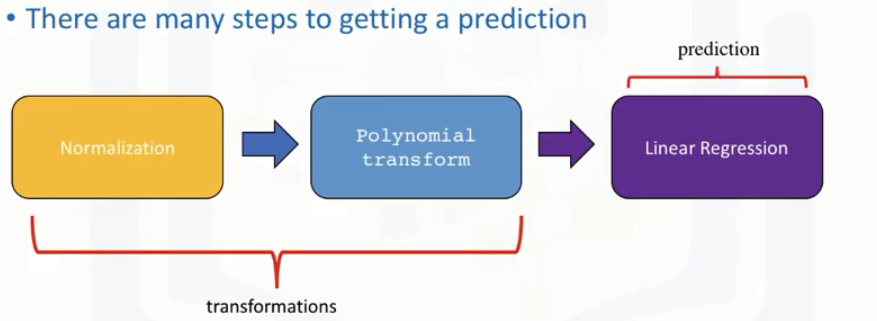

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]

In [39]:
#pipeline constructor
pipe = Pipeline(Input) # PIPE OBJECT

In [41]:
# we can train the pipeline
from sklearn.model_selection import train_test_split 
x1 = df[['horsepower', 'curb-weight', 'engine-size']]
y1 = df['price']
x_train, x_test, y_train,y_test = train_test_split(x1,y1, test_size=0.3)

In [44]:
# train the pipe object
#pipe.train(x_train, y_train)
# pipe.predict(x_test,y_test)

# model3 using polynomial regression

In [52]:
# lets first normalize all the parameters
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
# x_polly = pr.fit_transform(df[['horsepower', 'curb-weight', 'engine-size']])
# # we can also normalize the parameters before transforming it 
# from sklearn.preprocessing import StandardScaler
# SCALE = StandardScaler()
# SCALE.fit(df[['horsepower', 'curb-weight', 'engine-size']])
# x_scale = SCALE.transform(df[['horsepower', 'curb-weight', 'engine-size']])

In [53]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-locations', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'price_binned'],
      dtype='object')

In [59]:
X = df[['symboling', 'normalized-losses',
       'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size',
       'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg',]]

In [60]:
Y = df['price']

In [61]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [85]:
# normalizing the data
x_fit = scalar.fit(X)

C:\Users\me\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [86]:
x_fit

StandardScaler(copy=True, with_mean=True, with_std=True)

In [87]:
x_scale = x_fit.transform(X)

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [88]:
x_scale

array([[ 1.72333962,  0.01490004, -1.6828402 , ..., -0.24532602,
        -0.65277647, -0.53912772],
       [ 1.72333962,  0.01490004, -1.6828402 , ..., -0.24532602,
        -0.65277647, -0.53912772],
       [ 0.12824853,  0.01490004, -0.71172908, ..., -0.24532602,
        -0.96354805, -0.68549391],
       ...,
       [-1.46684256, -0.83940707,  1.69135944, ...,  0.79783375,
        -1.11893383, -1.12459248],
       [-1.46684256, -0.83940707,  1.69135944, ..., -0.66258993,
         0.12415246, -0.53912772],
       [-1.46684256, -0.83940707,  1.69135944, ...,  0.5892018 ,
        -0.96354805, -0.8318601 ]])

In [89]:
# LETS TRANSFORM X INTO POLYNOMIAL
x_poly = pr.fit_transform(x_scale)

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_poly,Y, test_size=0.3, random_state=100)

In [91]:
x_poly

array([[ 1.72333962,  0.01490004, -1.6828402 , ...,  0.42611712,
         0.35192989,  0.2906587 ],
       [ 1.72333962,  0.01490004, -1.6828402 , ...,  0.42611712,
         0.35192989,  0.2906587 ],
       [ 0.12824853,  0.01490004, -0.71172908, ...,  0.92842484,
         0.66050632,  0.4699019 ],
       ...,
       [-1.46684256, -0.83940707,  1.69135944, ...,  1.25201293,
         1.25834457,  1.26470824],
       [-1.46684256, -0.83940707,  1.69135944, ...,  0.01541383,
        -0.06693403,  0.2906587 ],
       [-1.46684256, -0.83940707,  1.69135944, ...,  0.92842484,
         0.80153717,  0.69199122]])

In [92]:
model3 = LinearRegression()

In [98]:
# lets train the the transformed polynomial data
lm = model3.fit(x_train,y_train)

In [99]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
# lets predict the using the test data
prediction = model3.predict(x_test)

In [101]:
prediction

array([ 17465.16829271,  17663.03606724,  17189.61603315,   7387.88835968,
        16435.61999704,  15496.90356722,   8852.99472687,   7903.40759566,
        12802.29576115,  18663.65586684,  11949.24751323,  30490.92596097,
       -22604.53835065,  23165.815962  ,  32581.54124988,  17014.4968944 ,
        27783.33763138,  31555.50203686,   8762.36178158,  16923.88208412,
        19994.38805643,   8626.9998449 ,  32076.51799005,  11717.73953174,
         7823.55828778,  17268.6328002 ,  10685.05505276,   8404.22496604,
        13781.92182836,  30490.92596097,   8443.61791604,  15558.40070038,
         6019.12148147,   8828.63973865,  10779.96826705,   4035.71377817,
         6671.53389728,  18459.47793482,  -6368.38334025,  10037.258236  ,
         7402.48354468,  15847.67022715,   7814.06646752,  10899.90842704,
        11129.95640688, -16362.86182791,   6609.05374076,  14073.28419607,
         7407.7317403 ,  21286.56680935,   9770.7842606 ,  -4431.6994204 ,
         5738.75891035,  

In [106]:
# lets calculate the r_stat to know the accuracy of our model
lm.score(x_test,y_test)

-0.21215574950470195

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
r2_score(y_test, prediction)

-0.21215574950470195

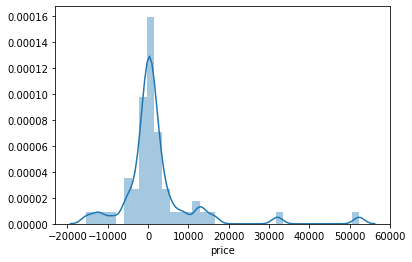

In [109]:
residual = (y_test - prediction)
sns.distplot(residual)

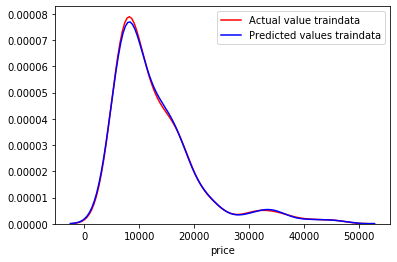

In [111]:
predict_train = lm.predict(x_train)
# lets see how the model fit the train data using the training data
actual = sns.distplot(y_train, hist=False, color='r', label='Actual value traindata')
# lets now show a dist containing both the actual and predicted
sns.distplot(predict_train, hist=False, color='b', label='Predicted values traindata', ax=actual)

In [112]:
# as we can see from the plot above, the model fits the train data so well. But does it do well with the test data?

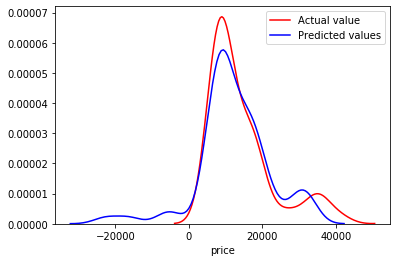

In [113]:
# lets see how the model will perform in real life using the test data
# lets get a distribution instead of a histogram, since hist are for discrete value 
actual = sns.distplot(y_test, hist=False, color='r', label='Actual value')
# lets now show a dist containing both the actual and predicted
sns.distplot(prediction, hist=False, color='b', label='Predicted values', ax=actual)

In [114]:
# as we can see, our model overfits the data, it learns the train data so well but it is not flexible to other unknown data.

In [115]:
pwd

'C:\\Users\\me\\Data_analysis_projects'